# 1) Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('spam.tsv',sep='\t')

In [6]:
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


# 2) Building the model

In [9]:
df.isna().sum()  # no missing values

label      0
message    0
length     0
punct      0
dtype: int64

In [11]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [15]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [17]:
df['label'].value_counts()/len(df)*100  # imbalanced data set

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

**To solve imbalanced dataset**

In [18]:
# for spam very less no of records are available,we will try to collect more data regarding spam category, to make 
# same proportion of data

In [23]:
ham = df[df['label']== "ham"]
spam = df[df['label']=='spam']

In [26]:
ham.shape , spam.shape

((4825, 4), (747, 4))

 **Make dataset same for both spam and ham**

In [27]:
ham = ham.sample(spam.shape[0])

In [28]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [47]:
data = pd.concat([ham,spam])

In [49]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [50]:
data.head()

,label,message,length,punct
1310,ham,"Ok, be careful ! Don't text and drive !",39,4
116,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,13
1404,ham,cool. We will have fun practicing making babies!,48,2
4426,ham,Just now saw your message.it k da:),35,3
1769,ham,How. Its a little difficult but its a simple w...,68,1


<function matplotlib.pyplot.show(close=None, block=None)>

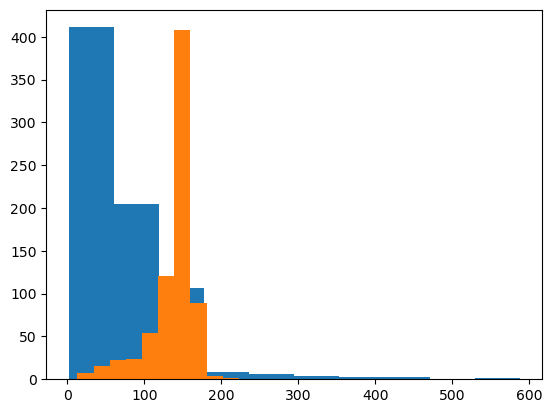

In [60]:
plt.hist(data[data['label']=='ham']['length'])
plt.hist(data[data['label']=='spam']['length'])

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

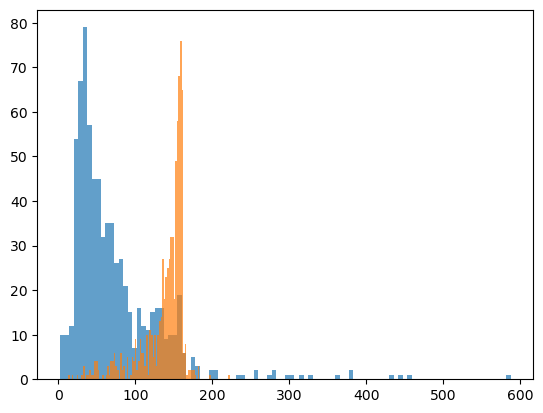

In [59]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show

In [ ]:
insighs = higher length massage has a very high probability that is belongs to a spam category.

<function matplotlib.pyplot.show(close=None, block=None)>

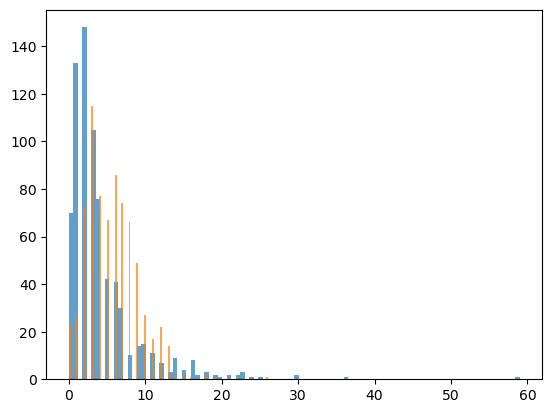

In [61]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show

In [ ]:
not any insights from above graph

# Building Model

In [62]:
# never ever use your testing dataset for model training (70-30)
# 70 % - training
# 30 % - testing
# use sklearn library

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.3, random_state=0,shuffle=True)

In [67]:
X_train.shape

(1045,)

In [69]:
X_test.shape

(449,)

**Random Forest**

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix


In [76]:
Classifier = Pipeline([('tfidf', TfidfVectorizer()),('classifier', RandomForestClassifier(n_estimators=10))])

In [77]:
Classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

**Predicting the result**

In [121]:
t_pred = Classifier.predict(X_test)

y_test, y_pred

In [80]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [82]:
accuracy_score(y_test,y_pred)*100

94.87750556792874

In [85]:
94.87*449/100

425.96630000000005

In [123]:
conf_matrix = confusion_matrix(y_test, t_pred)
print(conf_matrix)

[[224   3]
 [ 20 202]]


** Building the model (SVM)**

In [105]:
from sklearn.svm import SVC

In [112]:
svm = Pipeline([('tfidf', TfidfVectorizer()),('classifier',SVC( C=100, gamma='auto'))])

In [113]:
svm

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [115]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [116]:
y_pred = svm.predict(X_test)

In [118]:
accuracy_score(y_test,y_pred)*100

95.54565701559021

In [120]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[224   3]
 [ 17 205]]


In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



# test our data

In [133]:
test1 = ['Hello, You are learning natural language processing']
test2 = ['Hello, you are doing good and learning new things!']
test3 = ['Congratulations, You won a lottory ticket worth of $ 1 million! To claim call on 446677']

In [134]:
print(Classifier.predict(test1))
print(Classifier.predict(test2))
print(Classifier.predict(test3))

['ham']
['ham']
['spam']


In [135]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
